In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import cm

In [123]:
plt.rcParams["figure.figsize"]=30,15

In [260]:
#set simulation ranges
volume = [i for i in range(20000,30000,500)] #volume in range 10k - 30k

fx = [i/100 for i in range(122-10,122+10, 5)] #fx in range 0.9 - 1.8
fx_reverse = fx[::-1]

In [125]:
#costs function in terms of forward, call options and put options (extra)
def costs(students_volume, spot_rates, eur_costs = 1000, usd_costs = 1350, 
          forward_rate = 1.22, forward_volume = 0, 
          call_strike = 1.22, call_premium = 0.061,call_volume = 0,
          put_volume = 0, put_strike=1.22, put_premium = 0.061):
    
    array = np.zeros( (len(students_volume), len(spot_rates)))
    
    for i in range(len(students_volume)):
        for j in range(len(spot_rates)):
            
            revenue = students_volume[i]*usd_costs
            costs = students_volume[i]*eur_costs*spot_rates[j]
            forward_payoff = forward_volume*eur_costs*(spot_rates[j]-forward_rate)
            call_payoff = eur_costs*call_volume*max(0, spot_rates[j]-call_strike) - call_premium*call_volume*eur_costs
            put_payoff = eur_costs*put_volume*max(0, put_strike - spot_rates[j]) - put_premium*put_volume*eur_costs
            
            array[i,j] = revenue - costs + forward_payoff + call_payoff + put_payoff
            
    return array

In [140]:
def plot_3d_function(x,y,z, plot_type = 'surface', rotate = False, save=False, title = None):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    y_axis = np.array(y)
    x_axis = np.array(x)
    X, Y = np.meshgrid(x_axis, y_axis)
    if plot_type == 'surface':
        surf = ax.plot_surface(X, Y, z, cmap=cm.Set3)
        fig.colorbar(surf, ax=ax)
    elif plot_type == 'wireframe':
        surf = ax.plot_wireframe(X, Y, z)
    ax.set_xlabel('spot rate')
    ax.set_ylabel('students volume')
    ax.set_zlabel('profits ($)')
    if rotate:
        ax.view_init(10,110)
    if save:
        plt.savefig(title)
    plt.show()

In [261]:
spot_rates = fx
#spot_rates = fx_reverse

In [266]:
# no hedge
costs_ = costs(students_volume = volume, spot_rates = fx)

In [141]:
#100% forward
costs_ = costs(students_volume = volume, spot_rates = fx, forward_volume = 25000)

In [152]:
#100% call options
costs_ = costs(students_volume = volume, spot_rates = fx, call_volume = 25000)

In [79]:
#75% forward 25% call
costs_ = costs(students_volume = volume, spot_rates = fx, forward_volume = 25000*0.75, 
               forward_rate=1.22, call_volume = 25000*0.25)

In [93]:
#50%-50%
costs_ = costs(students_volume = volume, spot_rates = fx, forward_volume = 25000*0.5, 
               forward_rate=1.22, call_volume = 25000*0.5)

In [133]:
#25% forward 75% call options
costs_ = costs(students_volume = volume, spot_rates = fx, forward_volume = 25000*0.6, call_volume = 25000*0.4)

In [272]:
#50% forward 25% call 25% put
costs_ = costs(students_volume = volume, spot_rates = fx, 
               forward_volume = 25000*0.5, 
               call_volume = 25000*0.25, 
               put_volume =  25000*0.25)

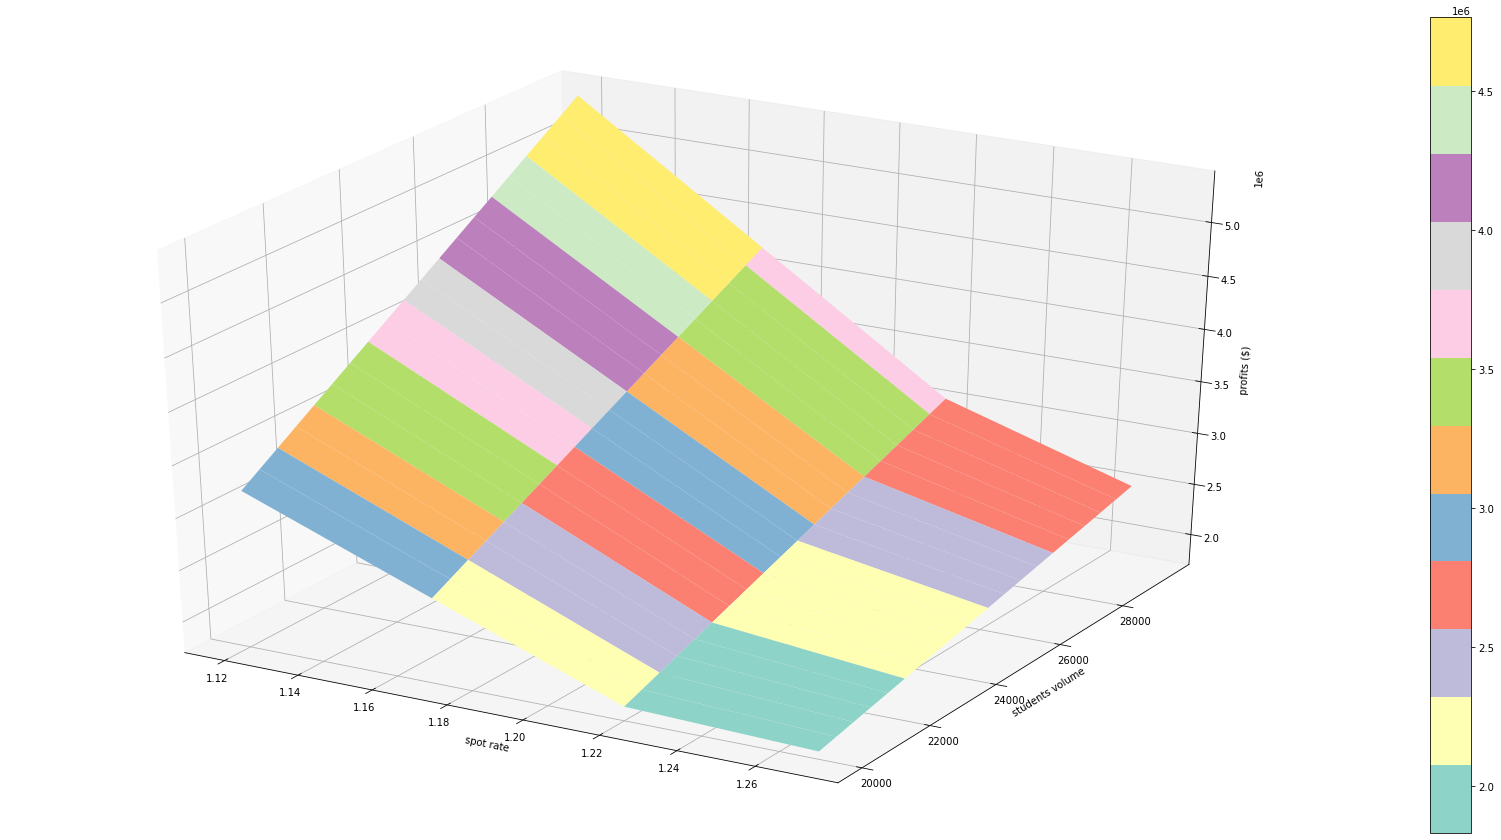

In [273]:
plot_3d_function(x = spot_rates,y = volume,z = costs_, plot_type = 'surface', rotate=False, save=False, title = 'mixed_fwd_calls_puts_surf')

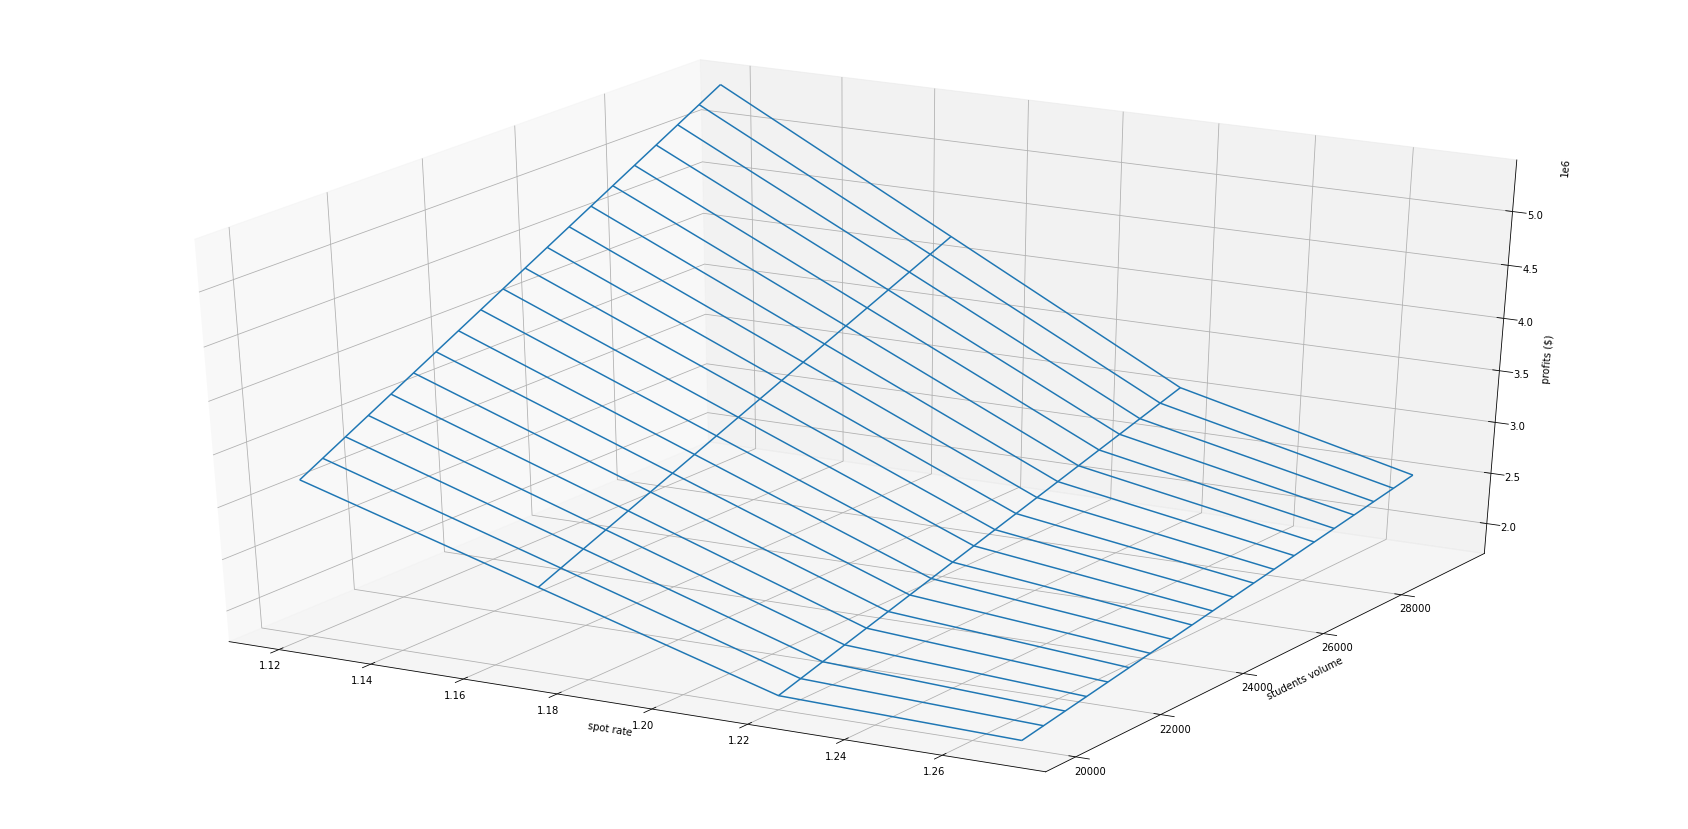

In [274]:
plot_3d_function(x = spot_rates,y = volume,z = costs_, plot_type = 'wireframe', rotate=False, save=True, title = 'mixed_fwd_calls_puts_wire')